In [74]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail()

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
df.shape

(395547, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
df.isna().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [9]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


In [10]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [11]:
print(df[['start', 'end']].min())
print(df[['start', 'end']].max())

start   2017-08-19
end     2017-08-26
dtype: datetime64[ns]
start   2019-02-04
end     2019-03-06
dtype: datetime64[ns]


**1. 청원 항목 별 투표 수 평균**
- 청원 항목 별로 투표수 평균을 보면 '반려동물'이 평균적으로 투표 수가 가장 많은 것을 알 수 있다. 사람들이 반려동물에 관심도가 높음을 알 수 있다.

In [164]:
df_category=df.groupby(by='category').mean()
df_category_mean=pd.DataFrame(df_category['votes'])
df_category_mean.sort_values(by=['votes'], ascending=False).reset_index()

,category,votes
0,반려동물,509.397091
1,인권/성평등,358.910296
2,문화/예술/체육/언론,227.923106
3,안전/환경,215.587669
4,육아/교육,175.247562
5,보건복지,174.710681
6,외교/통일/국방,138.815894
7,성장동력,120.203640
8,기타,106.619859
9,경제민주화,103.589591


**2. 분야 별 청원 답변 현황**
- 청와대에서 청원에 답변을 잘 하고 있는지 분야 별로 알아고보자 한다. 
- '인권/성평등' 분야가 아직 답변 받지 않은 청원이 15개로 가장 많다. 따라서 정부는 '인권/성평등'분야에 좀 더 주의를 기울여야 한다.

In [26]:
df['answer'] = (df['votes'] > 200000) == 1

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
 8   answer      395547 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(3), object(3)
memory usage: 24.5+ MB


In [143]:
df['answer'] = df['answer'].astype('int')
df['answer_diff'] = df['answer'] - df['answered']
df_answer=df[df['answer_diff']==1].groupby(by='category').sum()
df_answer=pd.DataFrame(df_answer.loc[:,'answer_diff'])
df_answer.sort_values(by=['answer_diff'], ascending=False).reset_index()

,category,answer_diff
0,인권/성평등,15
1,안전/환경,8
2,기타,7
3,정치개혁,6
4,반려동물,4
5,문화/예술/체육/언론,3
6,외교/통일/국방,3
7,육아/교육,2
8,경제민주화,1
9,교통/건축/국토,1


**3. 답변을 얻지 못한 청원 내용**

In [173]:
df_g=df[(df['answer_diff']==1)]
df_g.loc[:,'article_id':'content'].sort_values('category')

,article_id,start,end,answered,votes,category,title,content
154986,187633,2018-04-06,2018-05-06,0,242286,경제민주화,삼성증권 시스템 규제와 공매도 금지,우리사주 280만주에 배당 주당 1000원 하기로 하고 현금배당 28억원이 나가야될...
312931,408154,2018-10-16,2018-11-15,0,216448,교통/건축/국토,카풀반대,불법카풀을 허용을 반대합니다.\n수십년간 길바닦을 일터로 생계유지를 위해 고생하신\...
137035,164255,2018-03-12,2018-04-11,0,216886,기타,GMO완전표시제 시행을 촉구합니다!,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...
390787,510422,2019-01-29,2019-02-28,0,312197,기타,"경사 ***, 경장 *** 외 ***에서 뇌물받는지 조사부탁드립니다.","경사 ***, 경장 *** 등등 ***에서 뇌물받는지 조사부탁드립니다.\nㅡㅡㅡㅡㅡ..."
218365,282903,2018-06-24,2018-07-24,0,354935,기타,"가해자들은 떳떳이 생활하고, 집단 성폭행 당한 피해자인 저희아이는 오히려 더 죄인같...",저는 15살 여중생을 둔 엄마입니다.\n2018년 3월 저희 아이는 2000년생 남...
192426,242950,2018-05-25,2018-06-24,0,224539,기타,문재인 대통령님께 청원합니다.,"문재인 대통령님\n헌법개정안 실패, 풍계리 폭파, 북미정상회담 중지 등 오늘 하루만..."
175768,219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생..."
295554,384676,2018-09-19,2018-10-19,0,234236,기타,인천 여중생 자살 가해자 강력 처벌 희망 요망,저의 사랑스럽고 하나뿐인 동생에게\n인천 여중생 자살관련하여 궁금한이야기 y에도 방...
161950,199778,2018-04-15,2018-05-15,0,216163,기타,어른들에게 성적 학대와 조롱을 당하고 있는 아이들을 구해주세요.,"4월 1일 새벽 2시 경, 구글 서칭 중 불법 야동 사이트(https://y****..."
161851,199622,2018-04-14,2018-05-14,0,236714,문화/예술/체육/언론,티비 조선의 종편 허가 취소 청원,"과거부터 현재진행형으로 허위, 과장, 날조 보도를 일삼고\n국민의 알권리를 호도하는..."


**4. 투표수가 정부의 청원 답변여부에 영향을 줄까?**
- 청원 답변 여부에 따른 투표수 분포가 거의 동일하다.따라서 투표수와는 답변 여부는 관계가 없다.

<IPython.core.display.Javascript object>


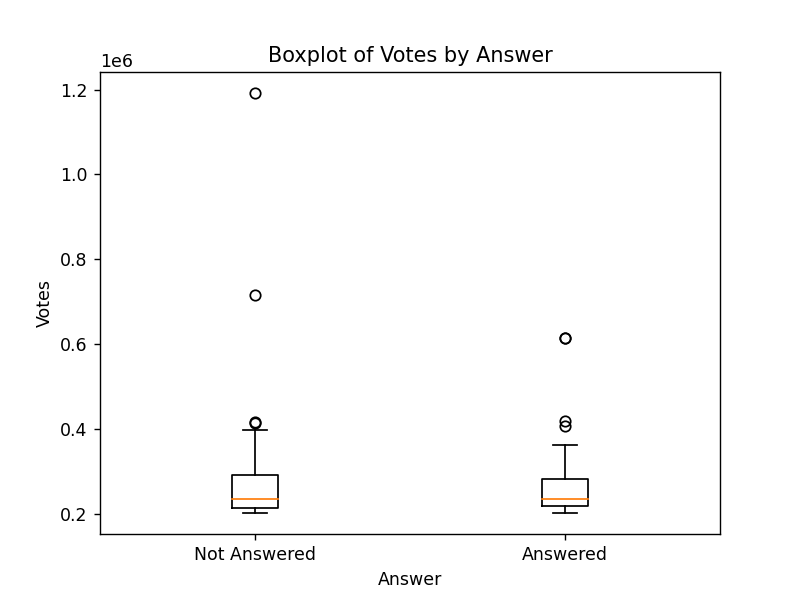

Text(0.5, 1.0, 'Boxplot of Votes by Answer')

In [81]:
df_an=df[(df['answer']==1)].sort_values(by=['votes'], ascending=False)
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)

axes1.boxplot([df_an[df_an['answer_diff'] == 1]['votes'],
               df_an[df_an['answer_diff'] == 0]['votes']], labels=['Not Answered', 'Answered'])

axes1.set_xlabel('Answer')
axes1.set_ylabel('Votes')
axes1.set_title('Boxplot of Votes by Answer')

**5. 시간이 지남에 따라 사람들이 청원에 많이 참여했을까?**
- 국민청원은 2017년 8월 17일에 처음 국민청원 사이트가 만들어졌다. 시간이 지날수록 국민청원에 대한 참여 빈도가 어떻게 변했을까?
- 국민청원 제도가 만들어지고 처음에 급격하게 많아지는 부분이 생기다가 시간이 지날수록 올라오는 청원의 개수의 평균정도로 일정하게 유지된다.

            count
start            
2017-08-19     39
2017-08-20     88
2017-08-21     89
2017-08-22     69
2017-08-23     80
...           ...
2019-01-31    994
2019-02-01    879
2019-02-02    522
2019-02-03    472
2019-02-04    387

[535 rows x 1 columns]


<IPython.core.display.Javascript object>


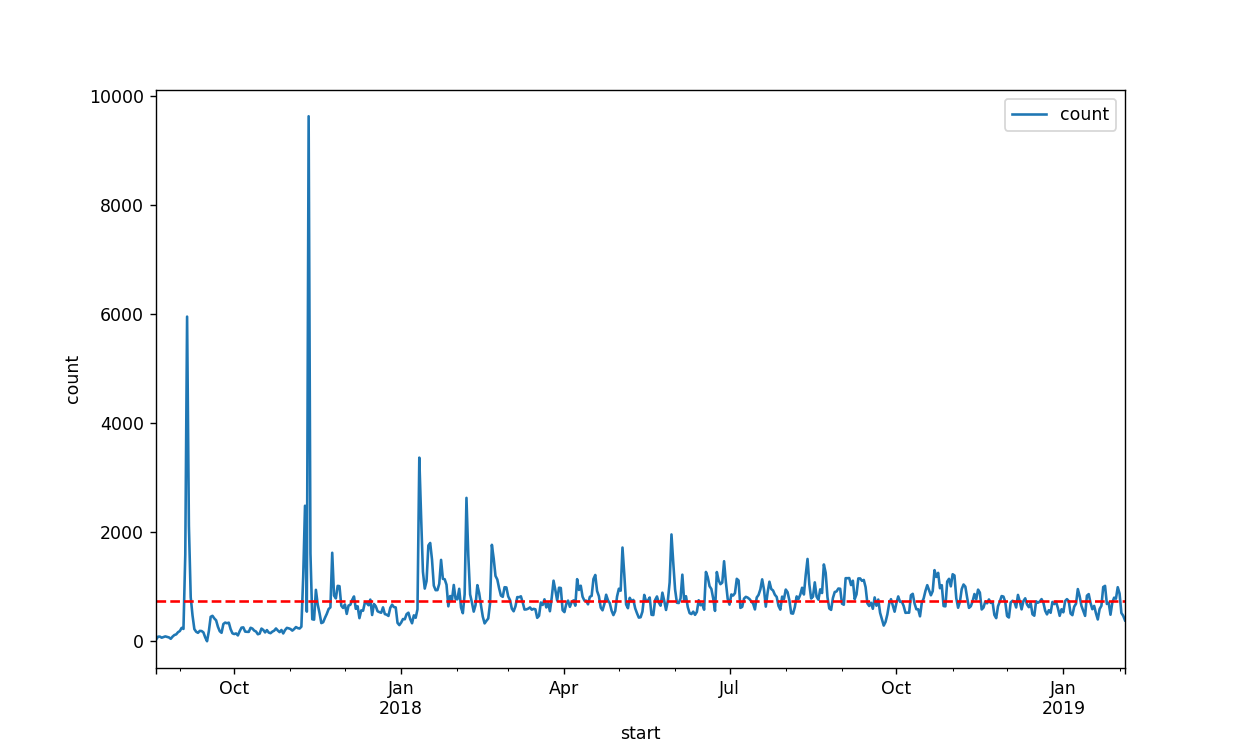

In [145]:
#날짜별로 청원이 올라오는 개수
df_date=pd.DataFrame(df.groupby(['start']).size()).reset_index()
df_date.index=df_date['start']
df_date.columns=['start','count']
df_date.drop('start', inplace=True, axis=1)
print(df_date)

ax=df_date.plot(xlabel='start', ylabel='count')
fig=ax.get_figure()
fig.set_size_inches(10,6)
plt.axhline(y= df_date["count"].mean(), linestyle='--', color='red', label="mean")